In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
cities = []

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)


In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [5]:
# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

In [4]:
# Because we could not read one file from the other, we are going to use the following
weather_api_key="c334a28706460f469f090fde04b34da0"

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c334a28706460f469f090fde04b34da0


In [8]:
#cities = ["Pittsburgh", "Austin", "New York", "Los Angeles", "Seattle"]

In [9]:
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Boston"
#print(city_url)

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | nishihara
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | tixkokob
Processing Record 9 of Set 1 | boksitogorsk
Processing Record 10 of Set 1 | pechora
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | limbang
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | westport
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | kemin
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | san jeronimo
Processing Record 21 of Se

City not found. Skipping...
Processing Record 35 of Set 4 | krasnoselkup
Processing Record 36 of Set 4 | dongsheng
Processing Record 37 of Set 4 | pilao arcado
City not found. Skipping...
Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | castenaso
Processing Record 41 of Set 4 | ponta delgada
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | sovetskiy
Processing Record 44 of Set 4 | samana
Processing Record 45 of Set 4 | juifang
City not found. Skipping...
Processing Record 46 of Set 4 | nchelenge
Processing Record 47 of Set 4 | marsh harbour
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | genhe
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | marawi
Processing Record 3 of Set 5 | nalut
Processing Record 4 of Set 5 | puerto escondido
Processing Record 5 of Set 5 | platteville
Processing Record 6 of Set 5 | klyuc

Processing Record 27 of Set 8 | umm kaddadah
Processing Record 28 of Set 8 | durban
Processing Record 29 of Set 8 | saintes
Processing Record 30 of Set 8 | kytlym
City not found. Skipping...
Processing Record 31 of Set 8 | lianzhou
Processing Record 32 of Set 8 | gagino
Processing Record 33 of Set 8 | bairiki
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | takoradi
Processing Record 36 of Set 8 | miranorte
City not found. Skipping...
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | kenai
Processing Record 40 of Set 8 | yakeshi
Processing Record 41 of Set 8 | asuncion
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | berdigestyakh
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | da nang
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | abancay
Processing Record 48 of Set 8 | lasa
Processing Record 49 of Set 8 | kodinar
Processing R

Processing Record 19 of Set 12 | santa rosa
Processing Record 20 of Set 12 | allapalli
Processing Record 21 of Set 12 | devils lake
Processing Record 22 of Set 12 | cervo
Processing Record 23 of Set 12 | port moresby
Processing Record 24 of Set 12 | luyang
Processing Record 25 of Set 12 | tumwater
Processing Record 26 of Set 12 | lubango
Processing Record 27 of Set 12 | talkha
Processing Record 28 of Set 12 | pangody
Processing Record 29 of Set 12 | batangafo
Processing Record 30 of Set 12 | calabozo
Processing Record 31 of Set 12 | swan river
Processing Record 32 of Set 12 | mareeba
Processing Record 33 of Set 12 | the valley
Processing Record 34 of Set 12 | voyvozh
Processing Record 35 of Set 12 | trairi
Processing Record 36 of Set 12 | marrakesh
Processing Record 37 of Set 12 | jiujiang
Processing Record 38 of Set 12 | lincoln
Processing Record 39 of Set 12 | mpika
Processing Record 40 of Set 12 | veendam
Processing Record 41 of Set 12 | camacha
Processing Record 42 of Set 12 | fall

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,45.36,69,96,3.69,GL,2021-08-16 04:50:31
1,Nishihara,26.1842,127.7558,89.65,72,40,10.36,JP,2021-08-16 04:51:13
2,Ushuaia,-54.8000,-68.3000,40.66,87,75,3.44,AR,2021-08-16 04:46:55
3,Kapaa,22.0752,-159.3190,82.72,69,20,3.00,US,2021-08-16 04:51:10
4,Busselton,-33.6500,115.3333,71.04,51,0,9.22,AU,2021-08-16 04:51:01
5,Tixkokob,21.0000,-89.4000,75.49,88,44,4.14,MX,2021-08-16 04:59:54
6,Boksitogorsk,59.4740,33.8485,56.95,92,59,9.17,RU,2021-08-16 04:59:54
7,Pechora,65.1472,57.2244,64.80,73,100,13.27,RU,2021-08-16 04:59:54
8,Butaritari,3.0707,172.7902,82.99,74,55,10.89,KI,2021-08-16 04:59:55
9,Hobart,-42.8794,147.3294,48.06,72,75,1.01,AU,2021-08-16 04:57:15


In [73]:
### YOU NEED TO START PULISHONG PREVIOUS DATA

# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-08-16 04:50:31,65.6145,-37.6368,45.36,69,96,3.69
1,Nishihara,JP,2021-08-16 04:51:13,26.1842,127.7558,89.65,72,40,10.36
2,Ushuaia,AR,2021-08-16 04:46:55,-54.8000,-68.3000,40.66,87,75,3.44
3,Kapaa,US,2021-08-16 04:51:10,22.0752,-159.3190,82.72,69,20,3.00
4,Busselton,AU,2021-08-16 04:51:01,-33.6500,115.3333,71.04,51,0,9.22
...,...,...,...,...,...,...,...,...,...
542,Mpika,ZM,2021-08-16 05:02:51,-11.8343,31.4529,53.76,78,0,8.79
543,Veendam,NL,2021-08-16 05:02:51,53.1067,6.8792,62.22,95,99,9.53
544,Camacha,PT,2021-08-16 05:02:51,33.0833,-16.3333,84.96,94,20,14.97
545,Fallon,US,2021-08-16 05:02:52,39.4735,-118.7774,84.92,14,0,5.10


In [74]:
### YOU NEED TO START PULISHONG PREVIOUS DATA

# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-08-16 04:50:31,65.6145,-37.6368,45.36,69,96,3.69
1,Nishihara,JP,2021-08-16 04:51:13,26.1842,127.7558,89.65,72,40,10.36
2,Ushuaia,AR,2021-08-16 04:46:55,-54.8000,-68.3000,40.66,87,75,3.44
3,Kapaa,US,2021-08-16 04:51:10,22.0752,-159.3190,82.72,69,20,3.00
4,Busselton,AU,2021-08-16 04:51:01,-33.6500,115.3333,71.04,51,0,9.22
5,Tixkokob,MX,2021-08-16 04:59:54,21.0000,-89.4000,75.49,88,44,4.14
6,Boksitogorsk,RU,2021-08-16 04:59:54,59.4740,33.8485,56.95,92,59,9.17
7,Pechora,RU,2021-08-16 04:59:54,65.1472,57.2244,64.80,73,100,13.27
8,Butaritari,KI,2021-08-16 04:59:55,3.0707,172.7902,82.99,74,55,10.89
9,Hobart,AU,2021-08-16 04:57:15,-42.8794,147.3294,48.06,72,75,1.01


In [76]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [78]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

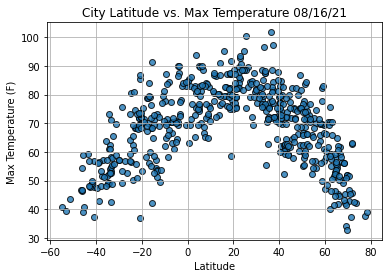

In [79]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

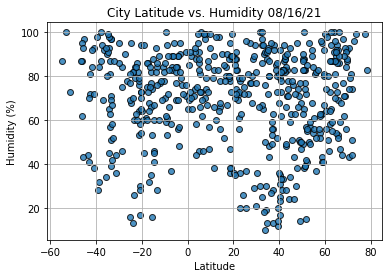

In [80]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


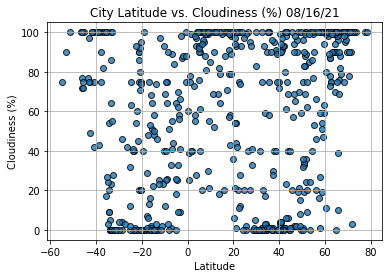

In [81]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


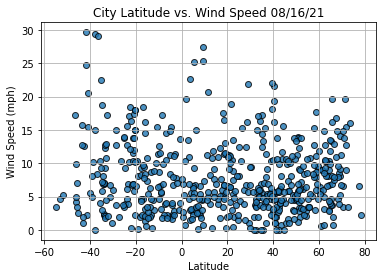

In [82]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [85]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [88]:
index13 = city_data_df.loc[13]
index13

City                      Fortuna
Country                        US
Date          2021-08-16 04:53:15
Lat                       40.5982
Lng                     -124.1573
Max Temp                    61.93
Humidity                       73
Cloudiness                     90
Wind Speed                   1.99
Name: 13, dtype: object

In [89]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
542    False
543     True
544     True
545     True
546    False
Name: Lat, Length: 547, dtype: bool

In [91]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-08-16 04:50:31,65.6145,-37.6368,45.36,69,96,3.69
1,Nishihara,JP,2021-08-16 04:51:13,26.1842,127.7558,89.65,72,40,10.36
3,Kapaa,US,2021-08-16 04:51:10,22.0752,-159.3190,82.72,69,20,3.00
5,Tixkokob,MX,2021-08-16 04:59:54,21.0000,-89.4000,75.49,88,44,4.14
6,Boksitogorsk,RU,2021-08-16 04:59:54,59.4740,33.8485,56.95,92,59,9.17
...,...,...,...,...,...,...,...,...,...
540,Jiujiang,CN,2021-08-16 05:02:50,29.7333,115.9833,84.06,77,100,0.36
541,Lincoln,US,2021-08-16 05:00:20,40.8000,-96.6670,72.90,78,4,1.01
543,Veendam,NL,2021-08-16 05:02:51,53.1067,6.8792,62.22,95,99,9.53
544,Camacha,PT,2021-08-16 05:02:51,33.0833,-16.3333,84.96,94,20,14.97


In [93]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-08-16 04:50:31,65.6145,-37.6368,45.36,69,96,3.69
1,Nishihara,JP,2021-08-16 04:51:13,26.1842,127.7558,89.65,72,40,10.36
3,Kapaa,US,2021-08-16 04:51:10,22.0752,-159.3190,82.72,69,20,3.00
5,Tixkokob,MX,2021-08-16 04:59:54,21.0000,-89.4000,75.49,88,44,4.14
6,Boksitogorsk,RU,2021-08-16 04:59:54,59.4740,33.8485,56.95,92,59,9.17


In [95]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

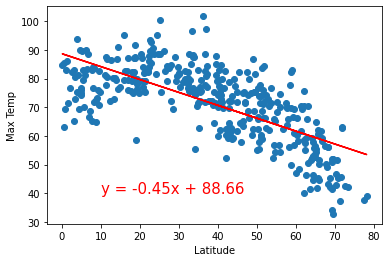

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

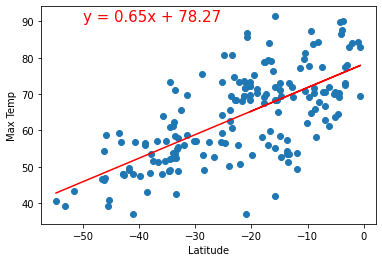

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


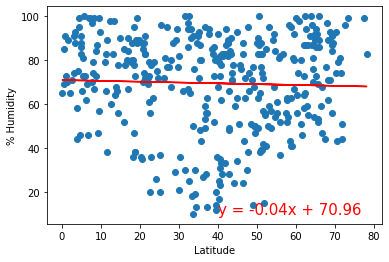

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

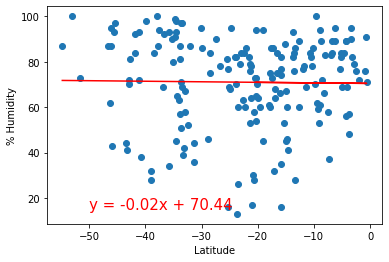

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

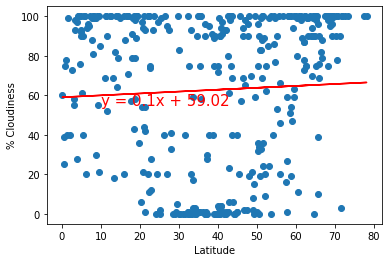

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

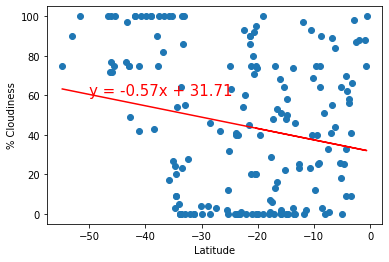

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

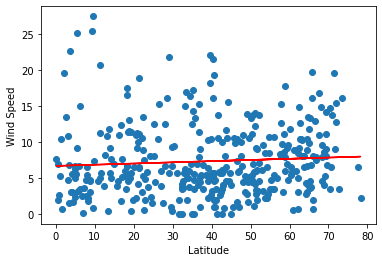

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

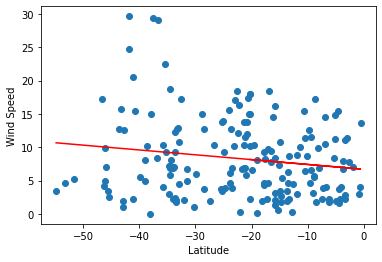

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))